# Predicting the selling price of a residential property depends on a number of factors, including the property age, availability of local amenities, and location.

In this challenge, you will use a dataset of real estate sales transactions to predict the price-per-unit of a property based on its features. The price-per-unit in this data is based on a unit measurement of 3.3 square meters

In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pt
from matplotlib import pyplot as pt


# Train the model
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor
import numpy as np

from sklearn.model_selection import train_test_split


In [138]:
#read the dataset and find missing values + features 
df_raw = pd.read_csv("real_estate.csv")
print('The raw file has {} nas in total'.format(df_raw.isna().sum().sum()))
print('The raw file has {:,} rows and {} columns'.format(df_raw.shape[0],df_raw.shape[1]))

The raw file has 0 nas in total
The raw file has 414 rows and 7 columns


In [139]:
display(df_raw.head())
display(df_raw.sample(10))

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
104,2012.667,32.7,392.4459,6,24.96398,121.54250,30.5
314,2013.250,3.7,577.9615,6,24.97201,121.54722,41.6
156,2013.583,30.7,1264.7300,0,24.94883,121.52954,18.3
224,2013.333,34.5,324.9419,6,24.97814,121.54170,46.0
327,2013.417,3.5,757.3377,3,24.97538,121.54971,36.7
250,2013.167,39.2,424.7132,7,24.97429,121.53917,30.0
389,2013.250,40.9,122.3619,8,24.96756,121.54230,67.7
135,2012.917,18.9,1009.2350,0,24.96357,121.54951,20.8
330,2013.083,32.0,1156.7770,0,24.94935,121.53046,12.8
248,2013.000,19.0,1009.2350,0,24.96357,121.54951,22.3


    The data consists of the following variables:

    transaction_date - the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)
    house_age - the house age (in years)
    transit_distance - the distance to the nearest light rail station (in meters)
    local_convenience_stores - the number of convenience stores within walking distance
    latitude - the geographic coordinate, latitude
    longitude - the geographic coordinate, longitude
    price_per_unit house price of unit area (3.3 square meters)

We can exmaine that is incorrect, hence we will fix it. 

We will for now fix it by extracting just the year for the column in order to proceed to data analysis.

In [140]:
df_raw_dates = df_raw['transaction_date'].astype(str).str.split('.',expand=True)
df_raw_dates

,0,1
0,2012,917
1,2012,917
2,2013,583
3,2013,5
4,2012,833
...,...,...
409,2013,0
410,2012,667
411,2013,25
412,2013,0


In [141]:
df = df_raw.copy()
df

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [142]:
df[['year','%M%D']]=df_raw_dates
df.head(100)

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit,year,%M%D
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9,2012,917
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2,2012,917
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3,2013,583
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8,2013,5
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1,2012,833
...,...,...,...,...,...,...,...,...,...
95,2012.917,8.0,104.81010,5,24.96674,121.54067,51.8,2012,917
96,2013.417,6.4,90.45606,9,24.97433,121.54310,59.5,2013,417
97,2013.083,28.4,617.44240,3,24.97746,121.53299,34.6,2013,083
98,2013.417,16.4,289.32480,5,24.98203,121.54348,51.0,2013,417


# Data Analysis

    Whats the average house_age per year
    price unit distribution 
    Average travel distance per lat long
    

Text(0.5, 0, 'Price per unit - 3 meter')

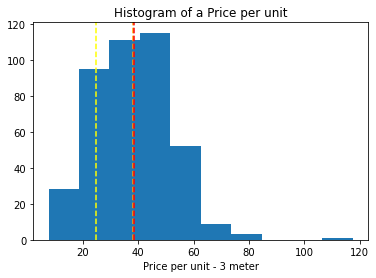

In [143]:
pt.hist(x=df.price_per_unit)
pt.axvline(x=df.price_per_unit.mean(),color='orange',ls='--')
pt.axvline(x=df.price_per_unit.median(),color='red',ls='--')
pt.axvline(x=df.price_per_unit.mode()[0],color='yellow',ls='--')
pt.title('Histogram of a Price per unit')
pt.xlabel('Price per unit - 3 meter')


From the graph above we can examine that the plot is postivly left skewed, we can cample an outlier between 100 to 120 price unit, so one house was sold within that range, while highest houses were sold within the range of 40-60

As we have to create many density plots we can optimize this by creating a function

In [144]:
def show_density(var_data):

    fig = pt.figure(figsize=(10,4))

    # Plot density
    var_data.plot.density()

    # Add titles and labels
    pt.title('Data Density')

    # Show the mean, median, and mode
    pt.axvline(x=var_data.mean(), color = 'cyan', linestyle='dashed', linewidth = 2)
    pt.axvline(x=var_data.median(), color = 'red', linestyle='dashed', linewidth = 2)
    pt.axvline(x=var_data.mode()[0], color = 'yellow', linestyle='dashed', linewidth = 2)

    # Show the figure
    pt.show()



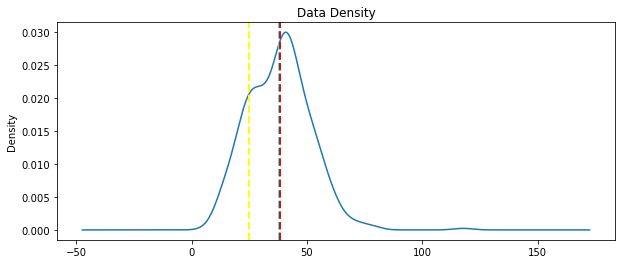

In [145]:
col = df['price_per_unit']
show_density(col)

In [146]:
import matplotlib.pyplot as pt
# Create a function that we can re-use
def show_distribution(var_data):
    

    '''
    This function will make a distribution (graph) and display it
    '''

    # Get statistics
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]

    print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                            mean_val,
                                                                                            med_val,
                                                                                            mod_val,
                                                                                            max_val))

    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = pt.subplots(2, 1, figsize = (10,4))

    # Plot the histogram   
    ax[0].hist(var_data)
    ax[0].set_ylabel('Frequency')

    # Add lines for the mean, median, and mode
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

    # Plot the boxplot   
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('Value')

    # Add a title to the Figure
    fig.suptitle('Data Distribution')

    # Show the figure
    fig.show()




Minimum:7.60
Mean:37.98
Median:38.45
Mode:24.70
Maximum:117.50



<ipython-input-146-b25b469611d0>:45: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



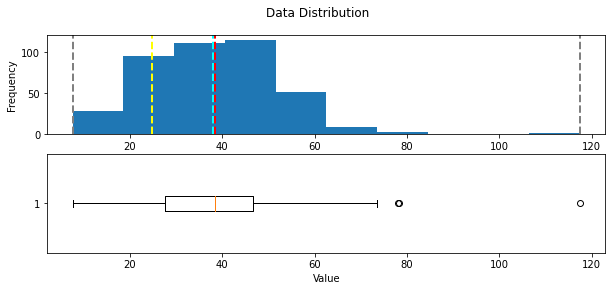

In [147]:

show_distribution(df['price_per_unit'])


Minimum:0.00
Mean:17.71
Median:16.10
Mode:0.00
Maximum:43.80



<ipython-input-146-b25b469611d0>:45: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



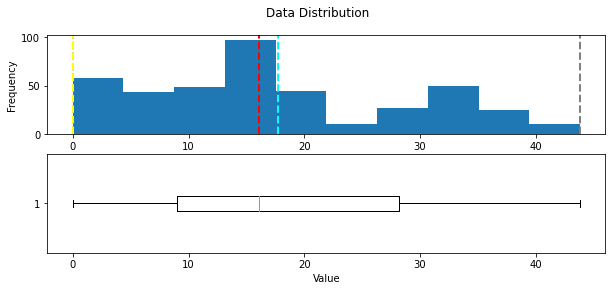

In [148]:
show_distribution(df['house_age'])


Minimum:23.38
Mean:1083.89
Median:492.23
Mode:289.32
Maximum:6488.02



<ipython-input-146-b25b469611d0>:45: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



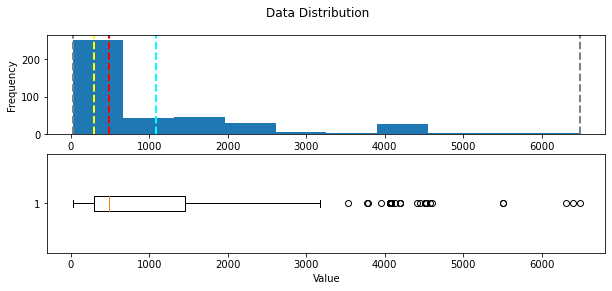

In [149]:
show_distribution(df['transit_distance'])

In [150]:
import plotly.express as ps
ps.defaults.template = "plotly_white"

In [151]:
ps.scatter(df,x='house_age',y='price_per_unit',title='House age verse Price per Unit')

The relationship shows that the mostly the price ranges between 20k to 75k, older houses genrelly have more value

We will remove outliers from our target varible price, as it would improve our analysis. 

In [152]:
df_updated=df.loc[df['price_per_unit']< 70]

Minimum:7.60
Mean:37.34
Median:38.25
Mode:24.70
Maximum:69.70



<ipython-input-146-b25b469611d0>:45: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



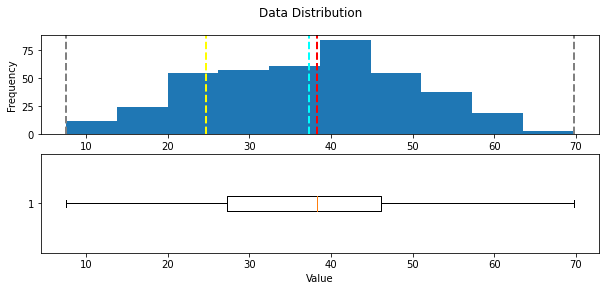

In [153]:
show_distribution(df_updated['price_per_unit'])

For the target varible is somewhat evenly distributed

<AxesSubplot:>

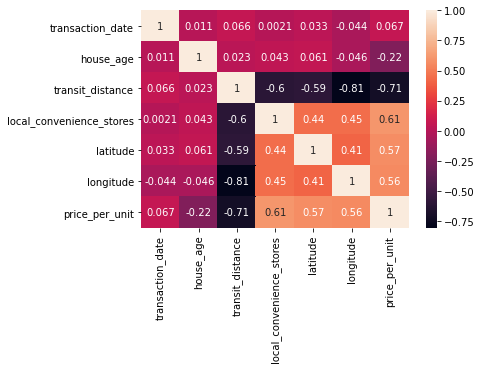

In [154]:
#Examining correlations

import seaborn as sns
sns.heatmap(df_updated.corr(),annot = True)

In [155]:
df_updated.columns


Index(['transaction_date', 'house_age', 'transit_distance',
       'local_convenience_stores', 'latitude', 'longitude', 'price_per_unit',
       'year', '%M%D'],
      dtype='object')

In [160]:
y = df.price_per_unit
X = df.drop('price_per_unit', axis=1)
X.head()

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,year,%M%D
0,2012.917,32.0,84.87882,10,24.98298,121.54024,2012,917
1,2012.917,19.5,306.59470,9,24.98034,121.53951,2012,917
2,2013.583,13.3,561.98450,5,24.98746,121.54391,2013,583
3,2013.500,13.3,561.98450,5,24.98746,121.54391,2013,5
4,2012.833,5.0,390.56840,5,24.97937,121.54245,2012,833


In [161]:
# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [162]:
drop_list = ['%M%D','transaction_date','year']
numeric_features = [ 'house_age', 'transit_distance',
       'local_convenience_stores', 'latitude', 'longitude',]

In [163]:
numeric_transformer = Pipeline(steps=[
('scaler', StandardScaler())
])

In [164]:
preprocessor = ColumnTransformer(
   transformers=[
    ('numeric', numeric_transformer, numeric_features),('drop_cols','drop',drop_list)
]) 

In [165]:
from sklearn.ensemble import RandomForestRegressor
pipeline = Pipeline(steps = [
               ('preprocessor', preprocessor)
              ,('regressor',RandomForestRegressor())
           ])

In [166]:
# fit the pipeline to train a linear regression model on the training set
model = pipeline.fit(X_train, (y_train))
print (model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['house_age',
                                                   'transit_distance',
                                                   'local_convenience_stores',
                                                   'latitude', 'longitude']),
                                                 ('drop_cols', 'drop',
                                                  ['%M%D', 'transaction_date',
                                                   'year'])])),
                ('regressor', RandomForestRegressor())])


MSE: 66.54272937676272
RMSE: 8.157372700616463
R2: 0.6095465315026887


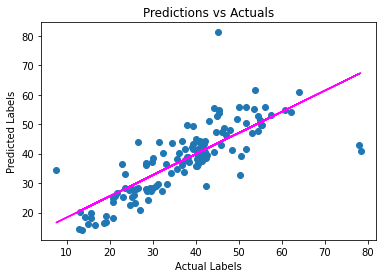

In [167]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

# Get predictions
predictions = model.predict(X_test)

# Display metrics
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Predictions vs Actuals')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

RMSE is 0.8, lets remove lat long as its just the direction as it has no correlation with our data

In [177]:
drop_list = ['%M%D','transaction_date','year','latitude','longitude']

preprocessor = ColumnTransformer(
   transformers=[
    ('numeric', numeric_transformer, numeric_features),('drop_cols','drop',drop_list)
]) 
from sklearn.svm import SVR
regressor = SVR(kernel = 'linear')

pipeline1 = Pipeline(steps = [
               ('preprocessor', preprocessor)
              ,('regressorSVR',regressor)
           ])
model = pipeline1.fit(X_train, (y_train))


MSE: 72.45028360647102
RMSE: 8.51177323514149
R2: 0.5748827138184827


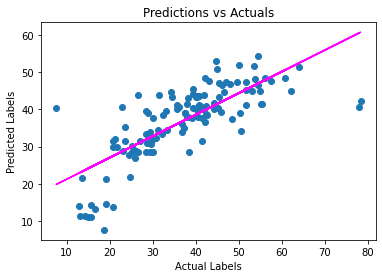

In [178]:
# Get predictions
predictions = model.predict(X_test)

# Display metrics
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Predictions vs Actuals')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

MSE: 63.1823186853922
RMSE: 7.948730633591265
R2: 0.6292644484308041


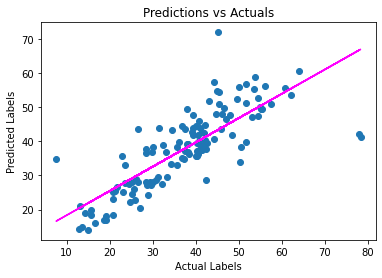

In [180]:
pipeline3 = Pipeline(steps = [
               ('preprocessor', preprocessor)
              ,('regressor',RandomForestRegressor())
           ])
model = pipeline3.fit(X_train, (y_train))
# Get predictions
predictions = model.predict(X_test)

# Display metrics
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Predictions vs Actuals')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()